In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed = 4396

In [2]:
from matplotlib.widgets import Button

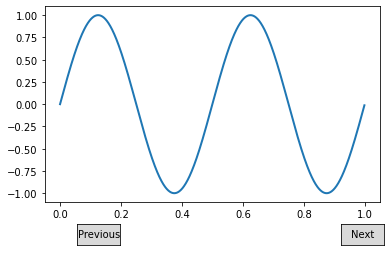

In [3]:
freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2) # 将图表位置上移一点
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2) # linewidth, 返回line对象可用于重绘


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata) # 为line设置新y坐标
        plt.draw() # redraw

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()


callback = Index()
axprev = plt.axes([0.2, 0.05, 0.1, 0.075]) # 指定位置: (左，下，宽， 高)
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next) # 绑定事件
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()


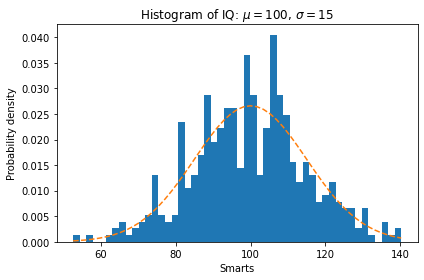

In [33]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
# density = counts / (sum(counts) * np.diff(bins))
# np.diff(bins) out[i] = a[i+1] - a[i] 输出比输入少1个元素
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


In [44]:
np.diff(bins)

51